<a href="https://colab.research.google.com/github/meghanagoru/Orthopaedic_surgery/blob/main/Thesis_ortho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-survival

In [ ]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

In [ ]:
d1 = pd.read_csv('DATA_Femur.csv',encoding = 'unicode_escape')
d2 = pd.read_csv('DATA_PF.csv')

for column in d1.columns:
    if d1[column].dtype == 'int64':
        d1[column] = d1[column].fillna(0)  # Fill with 0.0 for float columns
    elif d1[column].dtype == 'float64':
        d1[column] = d1[column].fillna(0)
    elif d1[column].dtype == 'object':
        d1[column] = d1[column].fillna('0')

for column in d2.columns:
    if d2[column].dtype == 'int64':
        d2[column] = d2[column].fillna(0)  # Fill with 0.0 for float columns
    elif d2[column].dtype == 'float64':
        d2[column] = d2[column].fillna(0.0)
    elif d2[column].dtype == 'object':
        d2[column] = d2[column].fillna('0')


In [ ]:
d1.loc[d1["Follow up at 1 year"] == "Alive","Survival duration(in months)"]=12
d1['Events'] = d1['Follow up at 1 year'].str.contains('Expired').astype(int)
d1

,Sl.no,code,codename,IpNo,HospNo,Age,S,R,DisDate,unit,Mode of injury,Comorbidities,Interval between injury and presentation,Interval between presentation and surgery,Morphology,Surgery done,Implant used,Follow up at 1 year,Survival duration(in months),Events
0,2,S72.0,FRACTURE OF NECK OF FEMUR,164062,2988598,60Y,F,I,24/01/2017,ORT001,0,0,0.0,0.0,NOF,0,Not available,?Periprosthetic fracture,0.0,0
1,3,S72.0,FRACTURE OF NECK OF FEMUR,166008,2634755,60Y,M,I,10/02/2017,ORT003,Slip and fall,DM,0.1,6.0,NOF,DHS,Not available,Alive,12.0,0
2,6,S72.0,FRACTURE OF NECK OF FEMUR,192822,3040363,60Y,M,I,10/06/2017,ORT001,0,0,0.0,0.0,0,0,0,Implant failure,0.0,0
3,9,S72.0,FRACTURE OF NECK OF FEMUR,218607,3089523,60Y,M,I,23/09/2017,ORT004,0,0,0.0,0.0,0,0,0,Non union (old case),0.0,0
4,11,S72.0,FRACTURE OF NECK OF FEMUR,240195,3129638,60Y,M,I,03/01/2018,ORT005,Slip and fall,HTN,0.1,6.0,NOF,Bipolar hemiarthroplasty,Not availalable,Alive FWB,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1125,S72.0,FRACTURE OF NECK OF FEMUR,534243,3610820,92Y,M,I,09/03/2022,ORT002,0,0,0.0,0.0,0,0,0,0,0.0,0
416,1130,S72.0,FRACTURE OF NECK OF FEMUR,183141,3023795,94Y,M,I,24/04/2017,ORT005,0,0,0.0,0.0,0,0,0,0,0.0,0
417,1131,S72.0,FRACTURE OF NECK OF FEMUR,206524,3065642,94Y,M,I,04/08/2017,ORT005,0,0,0.0,0.0,0,0,0,0,0.0,0
418,1137,S72.0,FRACTURE OF NECK OF FEMUR,198239,3050829,96Y,M,I,06/07/2017,ORT005,0,0,0.0,0.0,0,0,0,0,0.0,0


In [ ]:
d2.loc[d2["1 year follow up"] == "Alive","Survival Duration(in months)"]=12
d2['Events'] = d2['1 year follow up'].str.contains('Expired').astype(int)


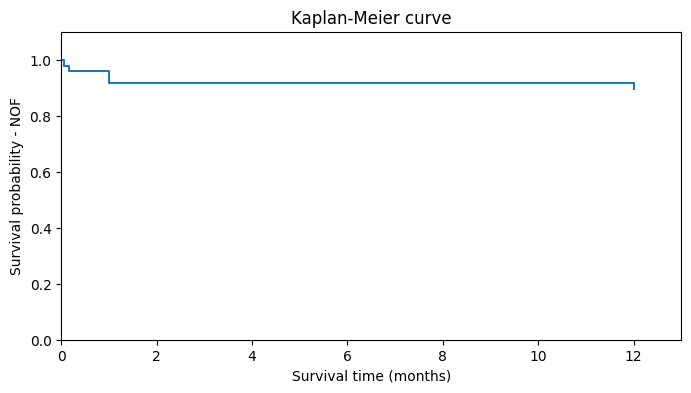

In [ ]:
duration, survival_probability = kaplan_meier_estimator(d1['Events']==1, d1['Survival duration(in months)'])
plt.figure(figsize=(8,4))
plt.step(x=duration, y=survival_probability, where="post")
plt.ylim(0,1.1)
plt.xlim(0,13)

plt.xlabel("Survival time (months)")
plt.ylabel("Survival probability - NOF")
plt.title("Kaplan-Meier curve");

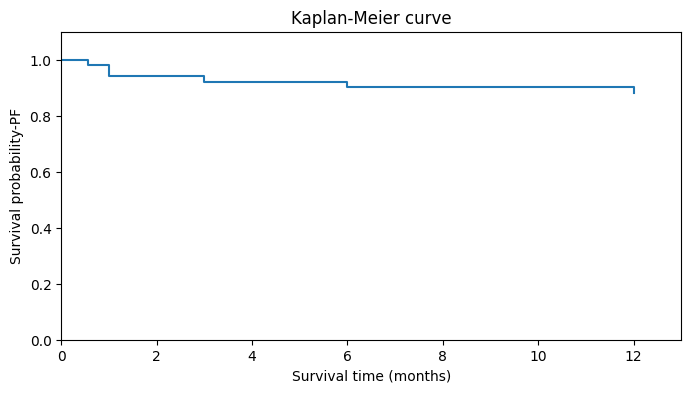

In [ ]:
duration2, survival_probability2 = kaplan_meier_estimator(d2['Events']==1, d2['Survival Duration(in months)'])
plt.figure(figsize=(8,4))
plt.step(x=duration2, y=survival_probability2, where="post")
plt.ylim(0,1.1)
plt.xlim(0,13)
plt.xlabel("Survival time (months)")
plt.ylabel("Survival probability-PF")
plt.title("Kaplan-Meier curve");

In [ ]:
from tabulate import tabulate

In [ ]:
data1=[]
data2=[]
for i in range(len(duration)):
  data1.append([duration[i],round(survival_probability[i],3)])
for i in range(len(duration2)):
  data2.append([duration2[i],round(survival_probability2[i],3)])

print("NOF")
print(tabulate(data1,headers=['duration','survival probability']))
print("PF")
print(tabulate(data2,headers=['duration','survival probability']))

NOF
  duration    survival probability
----------  ----------------------
      0                      1
      0.06                   0.979
      0.16                   0.958
      1                      0.917
      4                      0.917
     12                      0.895
PF
  duration    survival probability
----------  ----------------------
      0                      1
      0.56                   0.98
      1                      0.941
      3                      0.922
      6                      0.902
     12                      0.882


PART 2
MULTIPLE REGRESSION

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
d1['DM'] = d1['Comorbidities'].str.contains('DM').astype(int)
d1['HTN'] = d1['Comorbidities'].str.contains('HTN').astype(int)
d1['IHD'] = d1['Comorbidities'].str.contains('IHD').astype(int)
d1['CKD'] = d1['Comorbidities'].str.contains('CKD').astype(int)
d1['CLD'] = d1['Comorbidities'].str.contains('CLD').astype(int)
d1['BA'] = d1['Comorbidities'].str.contains('BA').astype(int)

d1['duration'] = np.where(((d1['Interval between injury and presentation']+\
                           d1['Interval between presentation and surgery']<=2)\
                           & (d1['Interval between injury and presentation']+\
                               d1['Interval between presentation and surgery']>0)), 0, 1)


In [ ]:


x = d1[['DM','IHD','HTN']]
y = d1['Events']

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=100)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
coef= clf.coef_[0]
var=['DM','IHD','HTN']


In [ ]:

acc = accuracy_score(y_test, y_pred)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(acc*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 0.0
Mean Square Error: 0.0
Root Mean Square Error: 0.0


In [ ]:
# new_record=[[1,1,1,1,0,0]]
# prediction = clf.predict(new_record)

# print("Predicted Outcome:", prediction)

Optimization terminated successfully.
         Current function value: 0.661732
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
P-values: 
 DM     0.070710
IHD    0.419210
HTN    0.005578
dtype: float64

Significance values:
 DM     1.150521
IHD    0.377568
HTN    2.253548
dtype: float64


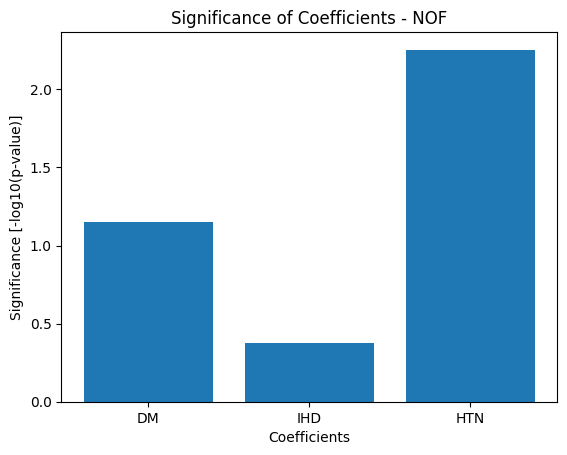

In [ ]:

X = sm.add_constant(x)

logit_model = sm.Logit(y, x)
result = logit_model.fit(method='bfgs',maxiter=1000)

p_values = result.pvalues

print("P-values:","\n", p_values)
print("\nSignificance values:\n",-np.log10(p_values))


plt.bar(range(len(p_values)), -np.log10(p_values))
plt.xlabel('Coefficients')
plt.ylabel('Significance [-log10(p-value)]')
plt.title('Significance of Coefficients - NOF')
plt.xticks(range(len(p_values)), x.columns)
plt.show()

# New Section

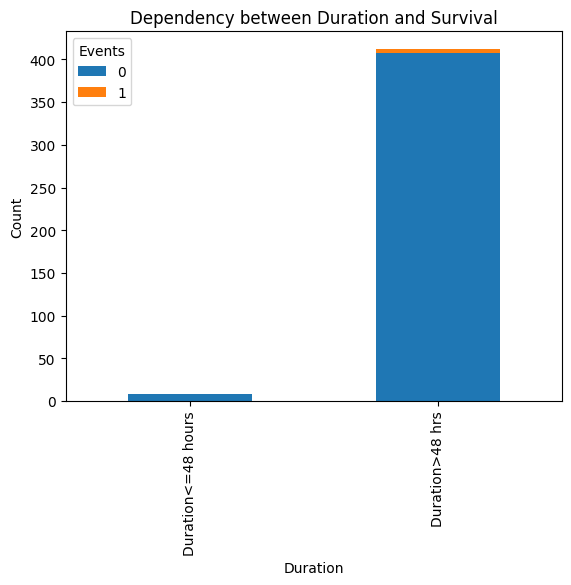

In [ ]:
counts = d1.groupby(['duration', 'Events']).size().unstack()

ax=counts.plot(kind='bar',stacked=True)

# Set the plot labels and title
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Dependency between Duration and Survival')
ax.set_xticklabels(['Duration<=48 hours', 'Duration>48 hrs'])
# Show the plot
plt.show()

PF - REGRESSION


In [ ]:
d2['DM'] = d2['Comorbidities'].str.contains('DM').astype(int)
d2['HTN'] = d2['Comorbidities'].str.contains('HTN').astype(int)
d2['IHD'] = d2['Comorbidities'].str.contains('IHD').astype(int)
d2['CKD'] = d2['Comorbidities'].str.contains('CKD').astype(int)
d2['CLD'] = d2['Comorbidities'].str.contains('CLD').astype(int)
d2['BA'] = d2['Comorbidities'].str.contains('BA').astype(int)

d2['duration'] = np.where(((d2['Interval between injury and presentation']+\
                           d2['Interval between presentation and surgery']<=2)\
                           & (d2['Interval between injury and presentation']+\
                               d2['Interval between presentation and surgery']>0)), 0, 1)

In [ ]:

x = d2[['DM','IHD','HTN']]
y = d2['Events']

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=100)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
coef= clf.coef_[0]
var=['DM','IHD','HTN']

In [ ]:
acc = accuracy_score(y_test, y_pred)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(acc*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 0.0
Mean Square Error: 0.0
Root Mean Square Error: 0.0


In [ ]:
new_record=[[1,0,0]]
prediction = clf.predict(new_record)

print("Predicted Outcome:", prediction)

Predicted Outcome: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.679584
         Iterations: 19
         Function evaluations: 112
         Gradient evaluations: 112
P-values: 
 DM     0.136719
IHD    0.816574
HTN    0.108700
dtype: float64

Significance values:
 DM     0.864173
IHD    0.088004
HTN    0.963772
dtype: float64


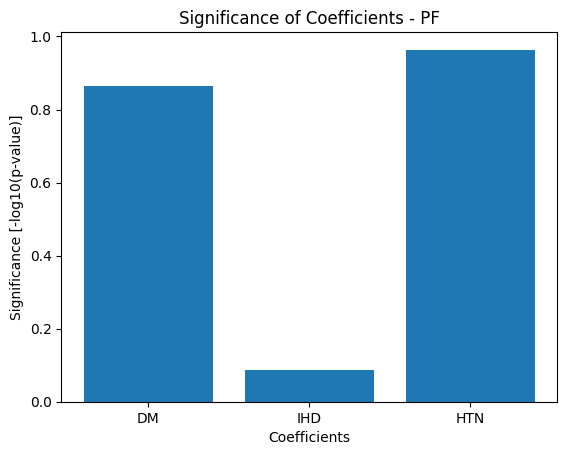

In [ ]:

X = sm.add_constant(x)

logit_model = sm.Logit(y, x)
result = logit_model.fit(method='cg',maxiter=1000)

p_values = result.pvalues

print("P-values:","\n", p_values)
print("\nSignificance values:\n",-np.log10(p_values))


plt.bar(range(len(p_values)), -np.log10(p_values))
plt.xlabel('Coefficients')
plt.ylabel('Significance [-log10(p-value)]')
plt.title('Significance of Coefficients - PF')
plt.xticks(range(len(p_values)), x.columns)
plt.show()

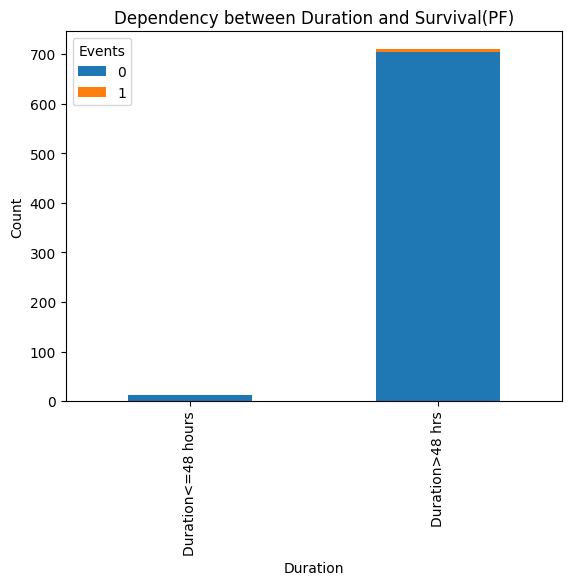

In [ ]:
counts = d2.groupby(['duration', 'Events']).size().unstack()

ax=counts.plot(kind='bar',stacked=True)

# Set the plot labels and title
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Dependency between Duration and Survival(PF)')
ax.set_xticklabels(['Duration<=48 hours', 'Duration>48 hrs'])
# Show the plot
plt.show()

In [ ]:
print("No. of females(NOF)",(d1['S'][d1['Follow up at 1 year'].str.lower().str.contains('expired') | d1['Follow up at 1 year'].str.lower().str.contains('alive')] == 'F').sum())
print("No. of males(NOF)",(d1['S'][d1['Follow up at 1 year'].str.lower().str.contains('expired') | d1['Follow up at 1 year'].str.lower().str.contains('alive')] == 'M').sum())
print("Average age",73.82)

No. of females(NOF) 30
No. of males(NOF) 22
Average age 73.82


In [ ]:
print("No. of females(PF)",(d2['S'][d2['1 year follow up'].str.lower().str.contains('expired') | d2['1 year follow up'].str.lower().str.contains('alive')] == 'F').sum())
print("No. of males(PF)",(d2['S'][d2['1 year follow up'].str.lower().str.contains('expired') | d2['1 year follow up'].str.lower().str.contains('alive')] == 'M').sum())
print("Average age: 75.06")

No. of females(PF) 22
No. of males(PF) 29
Average age: 75.06
